# Project Overview And Dataset

## Project
### In this project we will use Neural Network to know the person have COVID-19 or Normal person using CNN 
### through photo and make extraction to photo to know that COVID-19 is postive or negative.
## Dataset
### We use COVID-19 Radiography Database which is available on <a href = https://www.kaggle.com>Kaggle</a>  You can view and download
### the dataset from this <a href = https://www.kaggle.com/datasets/tawsifurrahma/covid19radiography-database > Link </a>.

# Preprocessing In Image

In [20]:
# Use to read images.
import cv2

In [2]:
IMG_DIMEN = 100 # original size is 100
N_COLORS = 3    # 3 use RGB , 1 use  Gray

In [3]:
def convert_img_to_matrix(img_path):
    
    '''
       Convert an image into matrix.
       
       Input:
       img_path ==> the path to find image
       
       Output:
       return image in array with shape (1, IMG_DIMEN, IMG_DIMEN, N_COLORS)
       
       This Function use constat parameter IMG_DIMEN AND N_COLORS.
    '''
    
    global IMG_DIMEN
    global N_COLORS
    img = cv2.imread(img_path)
    # Make scale to be in the same size.
    img = cv2.resize(img, dsize = (IMG_DIMEN, IMG_DIMEN))
    
    if N_COLORS == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif N_COLORS == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    # To shange the reshape of all photo be in the same size. ( if RGB OR GRAY ) 
    img = img.reshape((1, IMG_DIMEN, IMG_DIMEN, N_COLORS))
    return img

In [4]:
import os 

def get_list_of_image_paths(image_folder_name, extension):
    
    
    filenames = os.listdir(image_folder_name)
    image_paths_list = []
    for filename in filenames:
        if filename.endswith('.' + extension):
            image_paths_list.append(image_folder_name+'/'+filename)
    return image_paths_list

In [5]:
from tqdm import tqdm
import numpy as np

def convert_Images_to_matrix(img_paths):
    '''
       Input:
       img_paths ==> A list of paths of images returns by get_list_of_image_paths() function.
       
       Output:
       return a numpy array containing all image of img_paths with shape(n_images, IMG_DIMEN, IMG_DIMEN, N_COLORS)
    '''
    
    list_of_matrices = []
    for img_path in tqdm(img_paths):
        img = convert_img_to_matrix(img_path)
        list_of_matrices.append(img)
    return np.vstack(list_of_matrices)

In [6]:
def load_images(images_folder_name, extension):
    '''
      Input:
         images_folder_name ==> The full path of folder directly containing image.
         extension ==> file name extension for images.
         
      Output:
         Return numpy array containing all images. 
    '''
    imageList = get_list_of_image_paths(images_folder_name, extension)
    dataset = convert_Images_to_matrix(imageList)
    return dataset.astype('float32')/225         # Devide by 255 mean make feature scaling to be between 0 and 1.
                                                 # Trasform to float32 because deafult of opencv is unsignInt.

# Read Dataset

In [8]:
# Read part of dataset ==> Covid.
X_0 = load_images('COVID-19_Radiography_Dataset/COVID/images', 'png')

100%|█████████████████████████████████████████████████████████████████████████████| 3616/3616 [00:13<00:00, 258.59it/s]


In [9]:
# Read part of dataset ==> Noraml.
X_1 = load_images('COVID-19_Radiography_Dataset/Normal/images', 'png')

100%|███████████████████████████████████████████████████████████████████████████| 10192/10192 [00:37<00:00, 270.70it/s]


In [10]:
# Concate all train dataset.
X = np.vstack([X_0, X_1])

X.shape

(13808, 100, 100, 3)

In [11]:
y_0 = np.zeros((X_0.shape[0], 1))
y_1 = np.ones((X_1.shape[0], 1))

# Concate the output of train.
y = np.vstack([y_0, y_1]).flatten()
y.shape

(13808,)

In [12]:
# Delete element that not need to decrease consumption in ram.
del X_0
del X_1
del y_0
del y_1

# Splitting dataset to Train, Validation and Test

In [13]:
# Splitting dataset to tree parts train, validation and test.
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y,
                                        test_size = 0.20, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = 0.20, random_state = 0)

In [14]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_val.shape)
print(y_val.shape)
print()
print(X_test.shape)
print(y_test.shape)

(8836, 100, 100, 3)
(8836,)

(2210, 100, 100, 3)
(2210,)

(2762, 100, 100, 3)
(2762,)


# Represent Sample of Dataset

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# Function to show you any sample of photo in dataset.
def imshow(img):
    global N_COLORS
    plt.figure(figsize = (6, 6))
    if N_COLORS == 3:
        plt.imshow(img)
    elif N_COLORS == 1:
        plt.imshow(img, cmap = 'gray')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


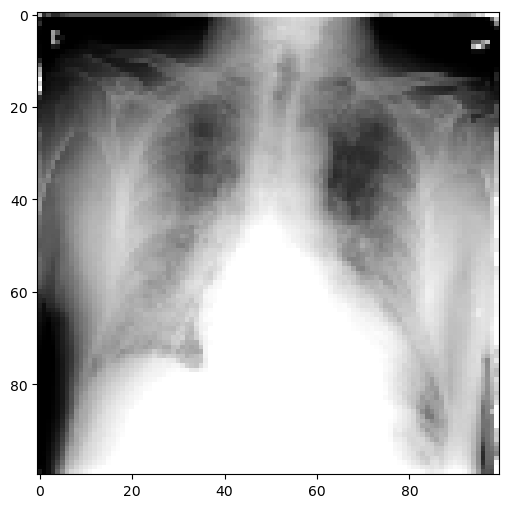

In [16]:
# Show the first image in training.
imshow(X_train[0])

# Build CNN Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

In [18]:
# Build your Model.
model = Sequential()

# Conv2D(number_of_filter, area_of_filter_that_use).
# imput_shape ==> to know the shap of all photos.
model.add(Conv2D(16, 7, activation = 'relu', input_shape = (IMG_DIMEN, IMG_DIMEN, N_COLORS)))
model.add(Conv2D(16, 7, activation = 'relu'))

# MaxPooling2D(area_of_filter_that_use).
model.add(MaxPooling2D(2))  # Use filter 2x2.

# Make another convoluation.
model.add(Conv2D(32, 5, activation = 'relu'))
model.add(Conv2D(32, 5, activation = 'relu'))

# Make another MaxPooling.
model.add(MaxPooling2D(2))  # Use filter 2x2.

# Make another convoluation.
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(Conv2D(64, 3, activation = 'relu'))

# Make another MaxPooling.
model.add(MaxPooling2D(2))  # Use filter 2x2.

# To make flatten and be in one dimension.
model.add(GlobalAveragePooling2D())

# Build normal neural network.
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train Model

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'saved-model/best-model', monitor = 'val_loss', model = 'min',
    save_weights_only = True, save_best_only = True, verbose = 1
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    batch_size = 32,
    epochs = 20,
    callbacks = [checkpoint]
)

Epoch 1/20
277/277 [==============================] - ETA: 0s - loss: 0.5916 - accuracy: 0.7346
Epoch 1: val_loss improved from inf to 0.58526, saving model to saved-model/best-model
277/277 [==============================] - 18s 23ms/step - loss: 0.5916 - accuracy: 0.7346 - val_loss: 0.5853 - val_accuracy: 0.7267
Epoch 2/20
277/277 [==============================] - ETA: 0s - loss: 0.5825 - accuracy: 0.7346
Epoch 2: val_loss did not improve from 0.58526
277/277 [==============================] - 5s 19ms/step - loss: 0.5825 - accuracy: 0.7346 - val_loss: 0.5865 - val_accuracy: 0.7267
Epoch 3/20
275/277 [============================>.] - ETA: 0s - loss: 0.5800 - accuracy: 0.7345
Epoch 3: val_loss did not improve from 0.58526
277/277 [==============================] - 5s 18ms/step - loss: 0.5799 - accuracy: 0.7346 - val_loss: 0.5880 - val_accuracy: 0.7267
Epoch 4/20
274/277 [============================>.] - ETA: 0s - loss: 0.5790 - accuracy: 0.7349
Epoch 4: val_loss did not improve from

# Visualization Dataset

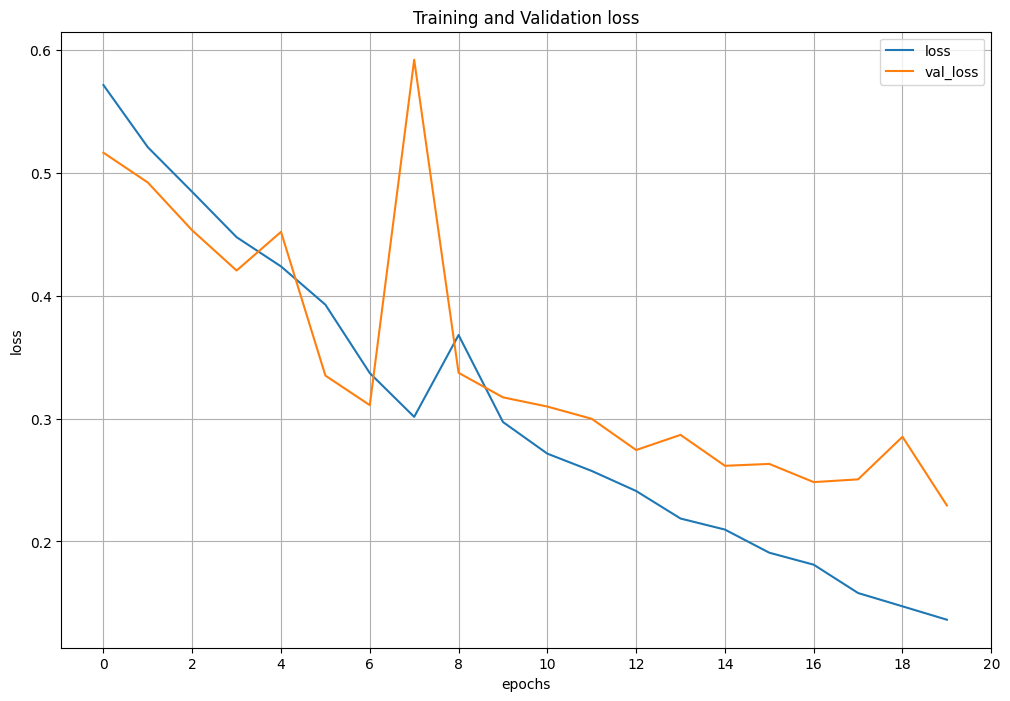

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

hist_df = pd.DataFrame(history.history)
hist_df.plot(y = ['loss', 'val_loss'], figsize = (12, 8))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis = 'both')
plt.xticks(np.arange(0, 21, 2))
plt.show()

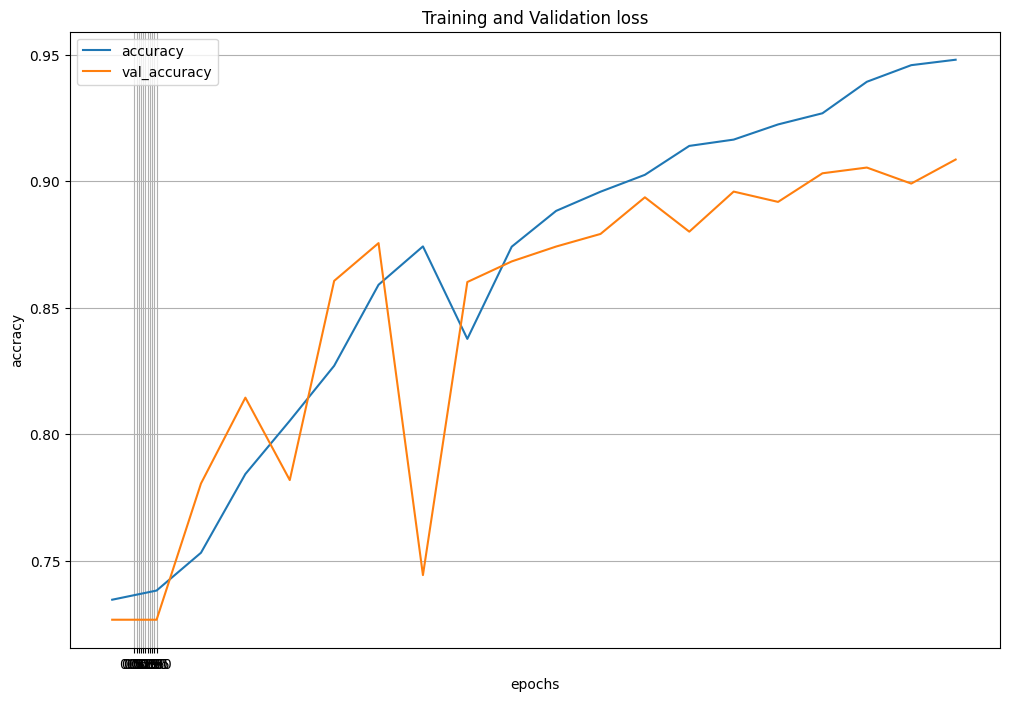

In [20]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y = ['accuracy', 'val_accuracy'], figsize = (12, 8))
plt.xlabel('epochs')
plt.ylabel('accracy')
plt.title('Training and Validation loss')
plt.grid(axis = 'both')
plt.xticks(np.arange(0, 21, 2))
plt.xticks(np.arange(0.5, 1.01, 0.05))
plt.show()

# Test Model

In [19]:
model.load_weights('saved-model/best-model')
model.evaluate(X_test, y_test)

87/87 [==============================] - 50s 567ms/step - loss: 0.1507 - accuracy: 0.9471


[0.15072058141231537, 0.9471397399902344]

# Build Transfer Learning Model

In [21]:
from tensorflow.keras.applications import Xception, DenseNet121, VGG16, InceptionResNetV2

In [29]:
from keras.optimizers import Adam
from tensorflow.keras.models import Model
import tensorflow as tf

In [32]:
shape = (100, 100, 3) 
OPTIMIZER = Adam(learning_rate = 0.001 , beta_1 = 0.9 , beta_2 = 0.999)
base_model= tf.keras.applications.InceptionResNetV2(
    include_top = False,
    weights = "imagenet",
    input_shape = shape,
    classifier_activation = "softmax",
)
base_model.trainable = True
x= base_model.output
x = GlobalAveragePooling2D()(x)
perdictions = Dense(1 , activation = 'sigmoid', name= 'Final' )(x)
model2 = Model(inputs = base_model.input , outputs = perdictions)
model2.compile(loss = 'binary_crossentropy', optimizer = OPTIMIZER , metrics = ['accuracy'])

In [41]:
Histoey = model2.fit(X_train, y_train, epochs = 20,  validation_data = (X_val, y_val))

Epoch 1/20
277/277 [==============================] - 45s 162ms/step - loss: 0.1141 - accuracy: 0.9585 - val_loss: 1.4499 - val_accuracy: 0.5081
Epoch 2/20
277/277 [==============================] - 40s 145ms/step - loss: 0.1052 - accuracy: 0.9612 - val_loss: 0.3765 - val_accuracy: 0.8624
Epoch 3/20
277/277 [==============================] - 40s 146ms/step - loss: 0.0934 - accuracy: 0.9646 - val_loss: 0.5799 - val_accuracy: 0.9294
Epoch 4/20
277/277 [==============================] - 43s 154ms/step - loss: 0.0919 - accuracy: 0.9706 - val_loss: 0.0966 - val_accuracy: 0.9656
Epoch 5/20
277/277 [==============================] - 40s 144ms/step - loss: 0.0548 - accuracy: 0.9821 - val_loss: 0.0637 - val_accuracy: 0.9783
Epoch 6/20
277/277 [==============================] - 43s 154ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0543 - val_accuracy: 0.9846
Epoch 7/20
277/277 [==============================] - 40s 144ms/step - loss: 0.0513 - accuracy: 0.9820 - val_loss: 0.0986 - val_ac

# Test Transfer Learning

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Predict the values of test.
y_pred = model2.predict(X_test).round()
print()

# Calculate the accuracy of unseen data.
print(accuracy_score(y_test, y_pred))

# Make report to test data.
target_names = ['Covid', 'Normal']
print(classification_report(y_test, y_pred, target_names = target_names, digits = 4))

87/87 [==============================] - 4s 40ms/step

0.9608979000724113
              precision    recall  f1-score   support

       Covid     0.9811    0.8546    0.9135       667
      Normal     0.9555    0.9947    0.9747      2095

    accuracy                         0.9609      2762
   macro avg     0.9683    0.9247    0.9441      2762
weighted avg     0.9617    0.9609    0.9599      2762

